# Comparison of Heart Disease Classifiers

## Authors: Rayhaan Rasheed, Solomon, Sam

### Data: 
### Overview:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
features = ["age", "sex", "cp", "trestbps",
            "chol", "fbs", "restecg", "thalach",
            "exang","oldpeak", "slope", "ca", "thal", "target"]
      
df = pd.read_csv(url, header = None, names=features)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Preprocessing and Data Analysis:
* EDA
* Encode the ordinal data
* Separate features and target
* Split into test and train 
* Build simple logistic regression as our base

In [9]:
import numpy as np

print('Number of rows before removing rows with missing values: ' + str(df.shape[0]))

# Replace ? with np.NaN
df = df.replace('?',np.NaN)

# Remove rows with np.NaN
df = df.dropna()

print('Number of rows after removing rows with missing values: ' + str(df.shape[0]))

Number of rows before removing rows with missing values: 303
Number of rows after removing rows with missing values: 297


In [4]:
cont_features = ['oldpeak','sex','chol','thalach']
df_0 = df[df.target == 0]
df_1 = df[df.target == 1]
df_2 = df[df.target == 2]
df_3 = df[df.target == 3]
df_4 = df[df.target == 4]

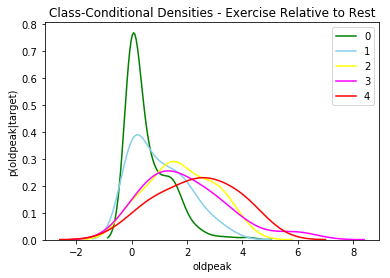

In [27]:
sns.distplot( df_0["oldpeak"] , color="green", label="0", hist=False)
sns.distplot( df_1["oldpeak"] , color="skyblue", label="1",hist=False)
sns.distplot( df_2["oldpeak"] , color="yellow", label="2",hist=False)
sns.distplot( df_3["oldpeak"] , color="magenta", label="3",hist=False)
sns.distplot( df_4["oldpeak"] , color="red", label="4",hist=False)
plt.legend()
plt.title("Class-Conditional Densities - Exercise Relative to Rest")
plt.ylabel("p(oldpeak|target)")
plt.show()

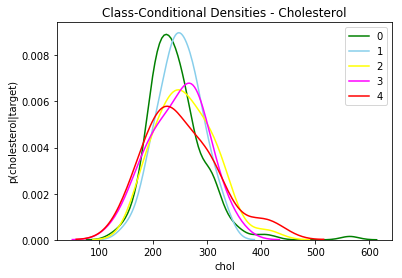

In [91]:
sns.distplot( df_0['chol'] , color="green", label="0", hist=False)
sns.distplot( df_1['chol'] , color="skyblue", label="1",hist=False)
sns.distplot( df_2['chol'] , color="yellow", label="2",hist=False)
sns.distplot( df_3['chol'] , color="magenta", label="3",hist=False)
sns.distplot( df_4['chol'] , color="red", label="4",hist=False)
plt.legend()
plt.title("Class-Conditional Densities - Cholesterol")
plt.ylabel("p(cholesterol|target)")
plt.show()

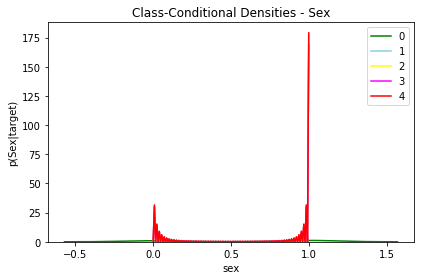

In [26]:
sns.distplot( df_0['sex'] , color="green", label="0", hist=False)
sns.distplot( df_1['sex'] , color="skyblue", label="1",hist=False)
sns.distplot( df_2['sex'] , color="yellow", label="2",hist=False)
sns.distplot( df_3['sex'] , color="magenta", label="3",hist=False)
sns.distplot( df_4['sex'] , color="red", label="4",hist=False)
plt.legend()
plt.title("Class-Conditional Densities - Sex")
plt.ylabel("p(Sex|target)")
plt.tight_layout()
plt.show()

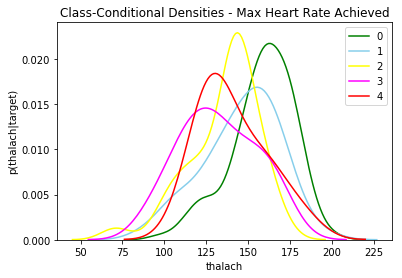

In [93]:
sns.distplot( df_0['thalach'] , color="green", label="0", hist=False)
sns.distplot( df_1['thalach'] , color="skyblue", label="1",hist=False)
sns.distplot( df_2['thalach'] , color="yellow", label="2",hist=False)
sns.distplot( df_3['thalach'] , color="magenta", label="3",hist=False)
sns.distplot( df_4['thalach'] , color="red", label="4",hist=False)
plt.legend()
plt.title("Class-Conditional Densities - Max Heart Rate Achieved")
plt.ylabel("p(thalach|target)")
plt.show()

#### Relabel Classes
* We want to turn the cassifier into a dichotomizer (binary) 
* OvA probelem focusing on class 0 in target

In [29]:
target = []
for i in df['target']:
    if i == 0:
        target.append(0)
    else:
        target.append(1)

y = pd.Series(target)       

# Specify the name of the features
features = list(df.drop('target', axis=1).columns)

# Get the feature vector
X = df[features]

#### Split Data & Standardize

In [32]:
from sklearn.model_selection import train_test_split

# Randomly choose 30% of the data for testing (set randome_state as 0 and stratify as y)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0, stratify=y)

In [33]:
from sklearn.preprocessing import StandardScaler

# Declare the StandardScaler
std_scaler = StandardScaler()

# Standardize the features in the training data
X_train = std_scaler.fit_transform(X_train)

# Standardize the features in testing data

X_test = std_scaler.transform(X_test)

<break>

<break>

## Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
# Delcare the model
rf = RandomForestClassifier(random_state=0, class_weight='balanced')
# Train the model
rf.fit(X_train,y_train)
# Print the classification accuracy
print('The accuracy of random forest is: ' + str(rf.score(X_test, y_test)))

The accuracy of random forest is: 0.7777777777777778


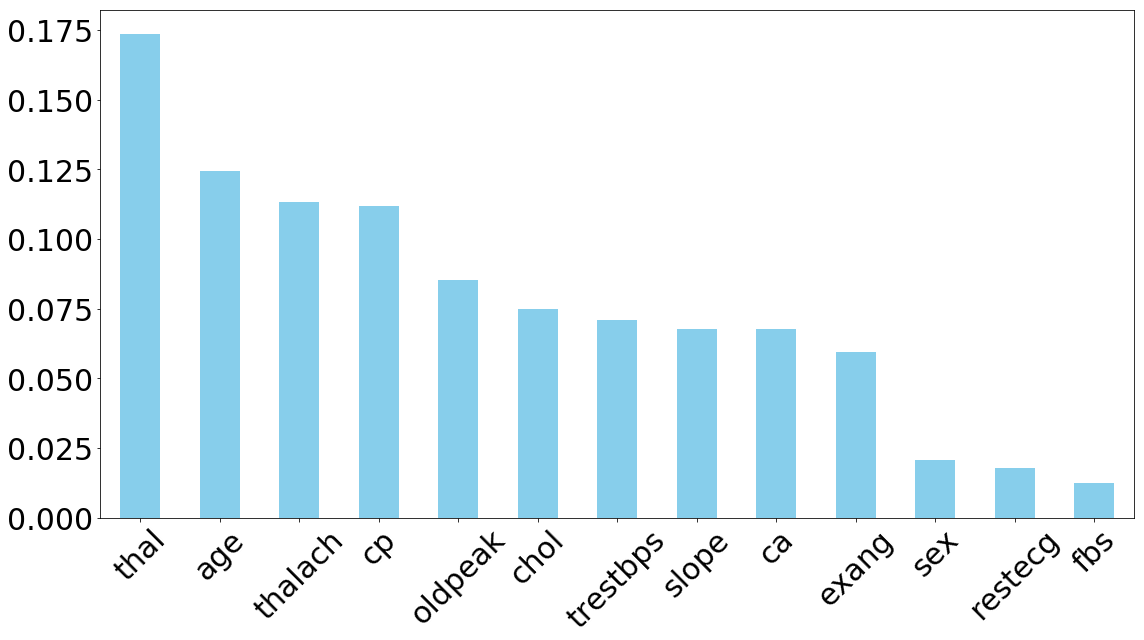

In [35]:
# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = f_importances = pd.Series(rf.feature_importances_, features)

# Sort the array in descending order of the importances
f_importances = f_importances.sort_values(ascending=False)

# Draw the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=30,color='skyblue')

# Show the plot
plt.tight_layout()
plt.show()

##### Top 4 Features
* Thal: HR type
* Age: Age of subject
* Thalach: Maximum heart rate achieved
* Cp: Chest Pain Type

<break>

## Model Evaluation
* Confusion Matrix
* Precision Score
* F1-score
* ROC Curve w/ AUC

In [41]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [45]:
### CONFUSION MATRIX PLOT FUNCTION ###
def conf_plot(confmat):
    fig, ax = plt.subplots(figsize=(2.5,2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.show()

### Random Forest

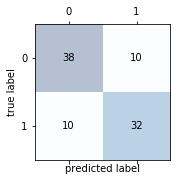

F1: 0.762


In [49]:
y_predict_rf = rf.predict(X_test)
confmat_rf = confusion_matrix(y_true = y_test, y_pred=y_predict_rf)
conf_plot(confmat_rf)
print('F1: %.3f' % f1_score(y_true=y_test,y_pred=y_predict_rf))